<a href="https://www.kaggle.com/code/shiviyadav/avocado-price-prediction-ml?scriptVersionId=105823984" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


# 1.Importing Required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook

# 2. Load the dataset

In [3]:
df = pd.read_csv('/kaggle/input/avocado-prices/avocado.csv')

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
df.shape

(18249, 14)

In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# 3.Check the presence of missing values

In [8]:
df.isnull().sum() 

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# To summarise the dataset we see;

14 columns (variables) and 18249 rows (observations)

There isn't any NULL variable

data types: float64(9), int64(2), object(3)

there are some unnamed/undefined columns

'region','type' and 'date' columns are in object format

# 3. Preprocessing of data

In [10]:
# drop unnamed column and rename undefined columns;

df = df.drop(['Unnamed: 0'], axis = 1)

df = df.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" })

# 4. Datatype Conversion

In [11]:
# convert Date column's format;

df['Date'] =pd.to_datetime(df.Date)

df.sort_values(by=['Date'], inplace=True, ascending=True)

df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


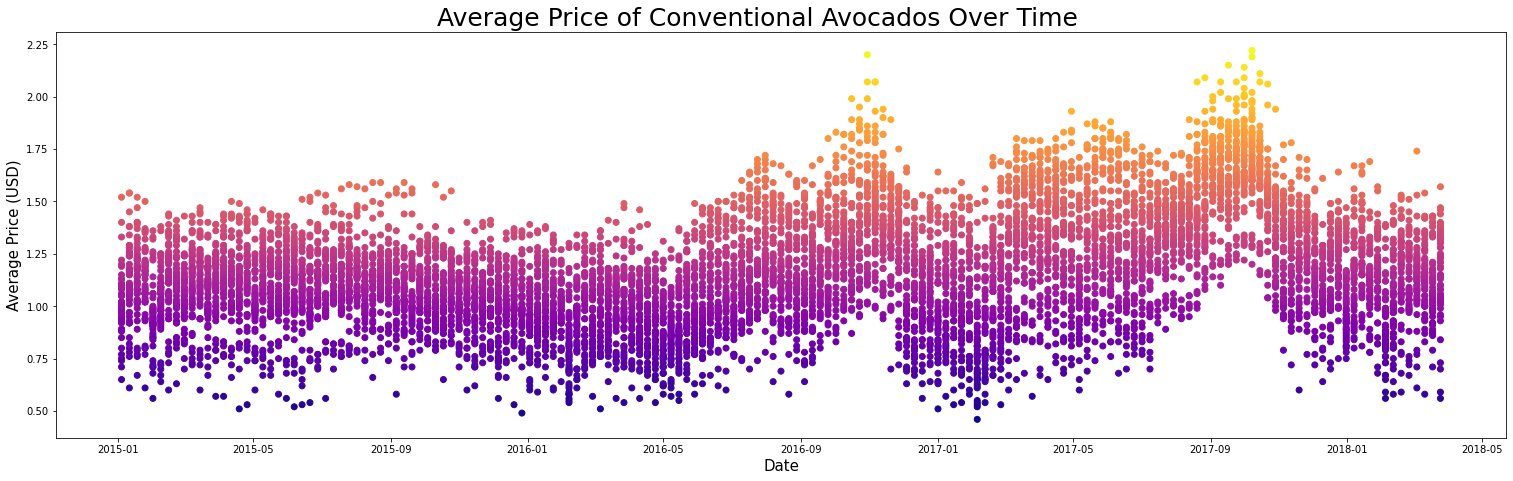

In [12]:
# Average price of Conventional Avocados over time

mask = df['type']== 'conventional'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)
dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()


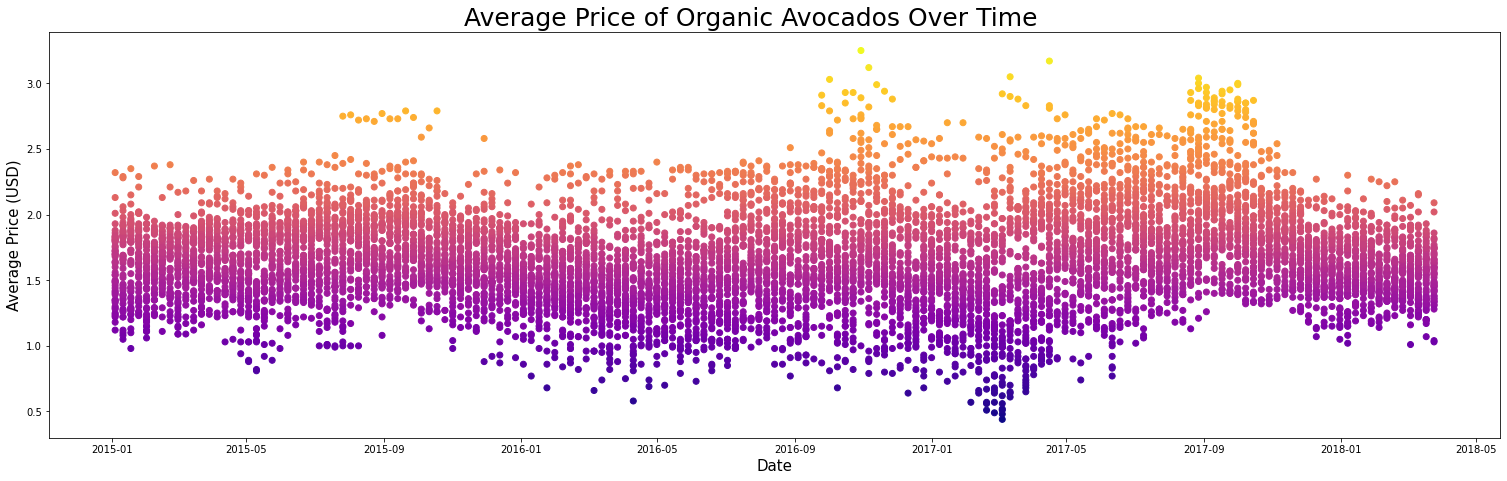

In [13]:
# Average price of Organic Avocados over time
mask = df['type']== 'organic'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

In [14]:
# Dropping the Date column (date format is not suitable for further analysis)
df = df.drop(['Date'], axis = 1)

In [15]:
# Checking if the sample is balanced
df.groupby('region').size() 

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

Insights
Approximately, there are 338 observations from each region, sample seems balanced.

In [16]:
len(df.region.unique())

54

In [17]:
df.region.unique() 

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [18]:
# basically we can remove states and work on cities rather than analysing both (to prevent multicollinerarity)

regionsToRemove = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
df = df[~df.region.isin(regionsToRemove)]
len(df.region.unique())

43

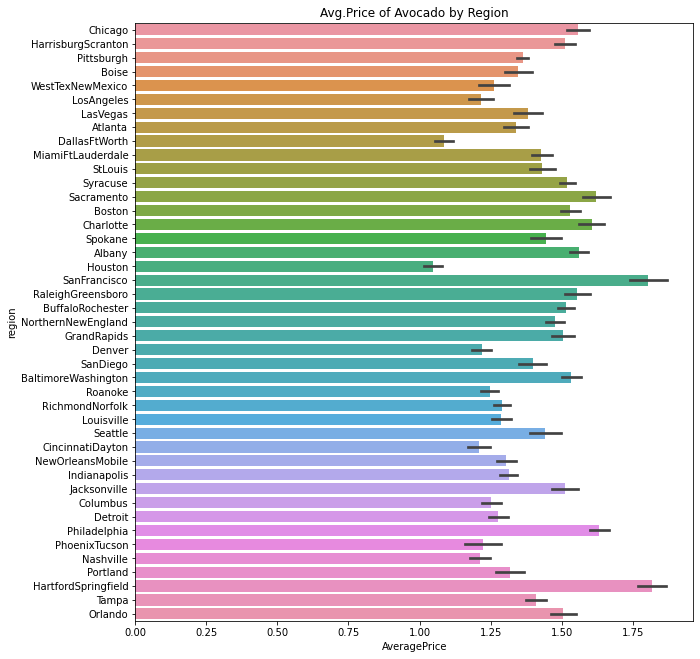

In [19]:
# The average prices by regions

plt.figure(figsize=(10,11))
plt.title("Avg.Price of Avocado by Region")
Av= sns.barplot(x="AveragePrice",y="region",data= df)

In [20]:
type_counts = df.groupby('type').size()
print(type_counts) 

type
conventional    7267
organic         7264
dtype: int64


Insights:
Types of avocados are also balanced

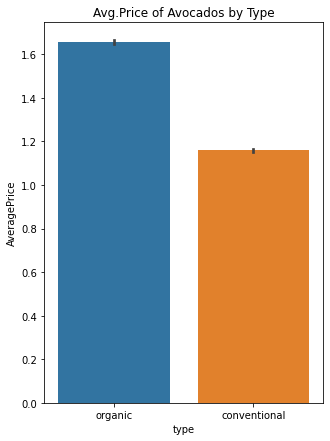

In [21]:
# The average prices of avocados by types; organic or not

plt.figure(figsize=(5,7))
plt.title("Avg.Price of Avocados by Type")
Av= sns.barplot(x="type",y="AveragePrice",data= df)

In [22]:
df[['Small Hass', "Large Hass", "XLarge Hass",'Small Bags','Large Bags','XLarge Bags','Total Volume','Total Bags']].corr()

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,Total Volume,Total Bags
Small Hass,1.000000,0.505321,0.412247,0.653724,0.348216,0.454440,0.890380,0.684041
Large Hass,0.505321,1.000000,0.580107,0.563730,0.265454,0.308823,0.787495,0.577115
XLarge Hass,0.412247,0.580107,1.000000,0.437290,0.121320,0.492822,0.576676,0.429245
Small Bags,0.653724,0.563730,0.437290,1.000000,0.238270,0.658700,0.836906,0.956905
Large Bags,0.348216,0.265454,0.121320,0.238270,1.000000,0.080479,0.429051,0.509324
XLarge Bags,0.454440,0.308823,0.492822,0.658700,0.080479,1.000000,0.549505,0.622964
Total Volume,0.890380,0.787495,0.576676,0.836906,0.429051,0.549505,1.000000,0.869796
Total Bags,0.684041,0.577115,0.429245,0.956905,0.509324,0.622964,0.869796,1.000000


<AxesSubplot:>

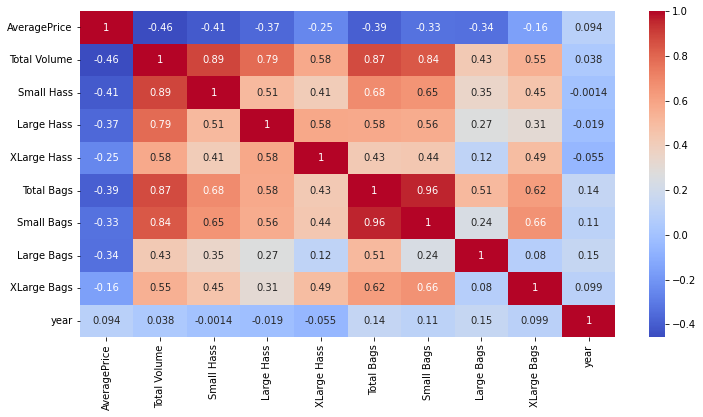

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Insights:
There is a high correlation between those pairs: 
1. small hass & total volume  (0.89)      
2. total bags & total volume  (0.87)      
3. small bags & total bags    (0.96)      

Small Hass avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag.
Retailers want to increase the sales of bagged avocados instead of bulks. They think this is more advantageous for them.
Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so we can say that most of the bagged sales comes from the small bags.

In [24]:
df_V = df.drop(['AveragePrice', 'Total Volume', 'Total Bags'], axis = 1).groupby('year').agg('sum')
df_V

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
year,,,,,,
2015,3.956835e+08,3.816794e+08,34551068.97,1.424565e+08,28409959.31,1324210.40
2016,3.373537e+08,3.684409e+08,37822298.99,2.630756e+08,80734611.45,4894984.66
2017,3.667922e+08,3.405079e+08,22968983.86,2.811956e+08,93246243.70,5384099.35
2018,1.013592e+08,8.963867e+07,5804442.33,7.920550e+07,28310113.38,1589371.50


Text(0, 0.5, '')

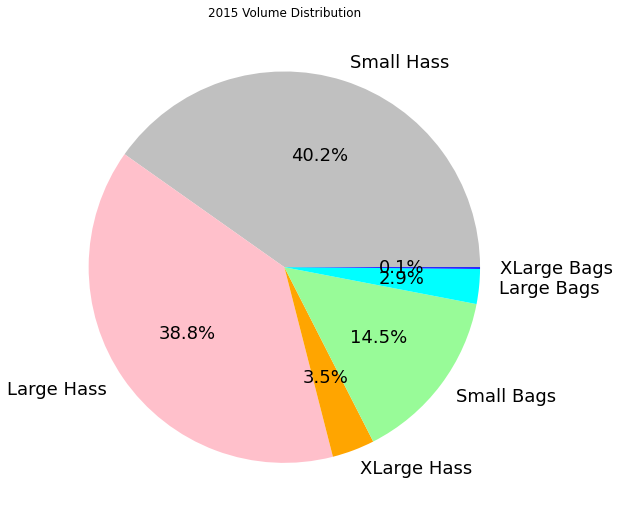

In [25]:
indexes = ['Small Hass', 'Large Hass', 'XLarge Hass', 'Small Bags', 'Large Bags', 'XLarge Bags']
series = pd.DataFrame({'2015': df_V.loc[[2015],:].values.tolist()[0],
                      '2016': df_V.loc[[2016],:].values.tolist()[0],
                      '2017': df_V.loc[[2017],:].values.tolist()[0],
                      '2018': df_V.loc[[2018],:].values.tolist()[0]}, index=indexes)
series.plot.pie(y='2015',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2015 Volume Distribution').set_ylabel('')


Text(0, 0.5, '')

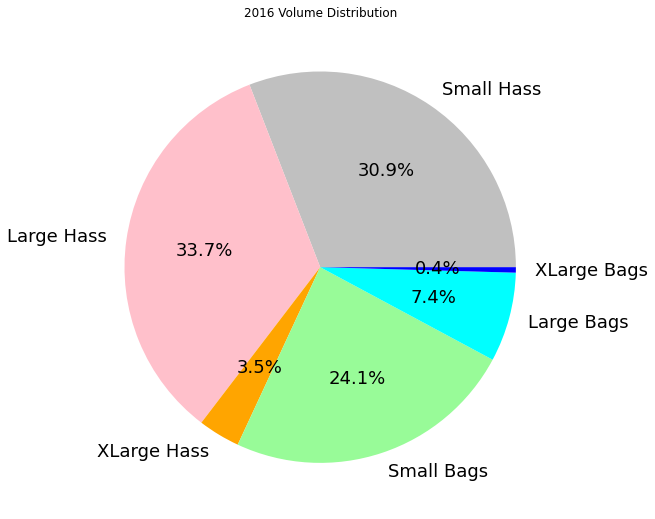

In [26]:
series.plot.pie(y='2016',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2016 Volume Distribution').set_ylabel('')

Text(0, 0.5, '')

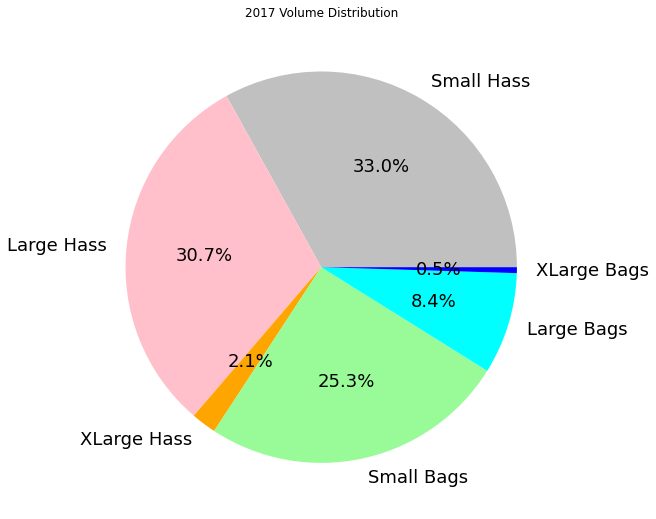

In [27]:
series.plot.pie(y='2017',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2017 Volume Distribution').set_ylabel('')

Text(0, 0.5, '')

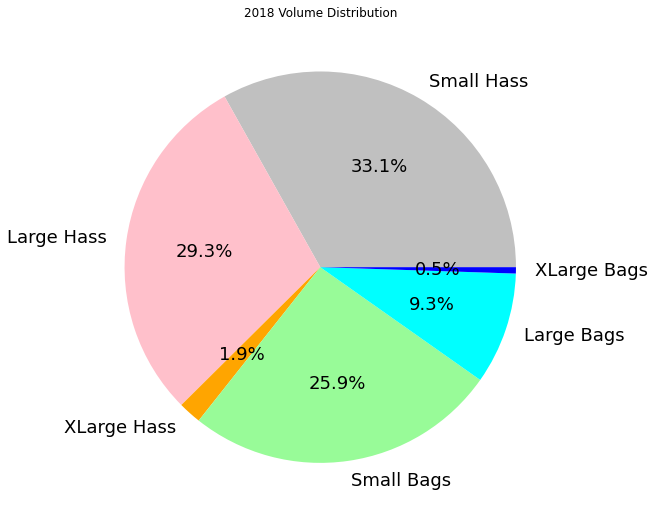

In [28]:
series.plot.pie(y='2018',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2018 Volume Distribution').set_ylabel('')

In [29]:
# Total Bags = Small Bags + Large Bags + XLarge Bags

df = df.drop(['Total Bags'], axis = 1)

In [30]:
# Total Volume = Small Hass +Large Hass +XLarge Hass + Total Bags , to avoid multicollinearity I also drop Total Volume column.


df = df.drop(['Total Volume'], axis = 1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14531 entries, 9593 to 8574
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  14531 non-null  float64
 1   Small Hass    14531 non-null  float64
 2   Large Hass    14531 non-null  float64
 3   XLarge Hass   14531 non-null  float64
 4   Small Bags    14531 non-null  float64
 5   Large Bags    14531 non-null  float64
 6   XLarge Bags   14531 non-null  float64
 7   type          14531 non-null  object 
 8   year          14531 non-null  int64  
 9   region        14531 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.7+ MB


In [32]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)

              AveragePrice  Small Hass  Large Hass  XLarge Hass  Small Bags  Large Bags  \
AveragePrice         1.000      -0.412      -0.365       -0.253      -0.329      -0.335   
Small Hass          -0.412       1.000       0.505        0.412       0.654       0.348   
Large Hass          -0.365       0.505       1.000        0.580       0.564       0.265   
XLarge Hass         -0.253       0.412       0.580        1.000       0.437       0.121   
Small Bags          -0.329       0.654       0.564        0.437       1.000       0.238   
Large Bags          -0.335       0.348       0.265        0.121       0.238       1.000   
XLarge Bags         -0.158       0.454       0.309        0.493       0.659       0.080   
year                 0.094      -0.001      -0.019       -0.055       0.109       0.150   

              XLarge Bags   year  
AveragePrice       -0.158  0.094  
Small Hass          0.454 -0.001  
Large Hass          0.309 -0.019  
XLarge Hass         0.493 -0.055  
Small

In [33]:
# Standardizing (scaling) the variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:,'Small Hass':'XLarge Bags']= scaler.fit_transform(df.loc[:,'Small Hass':'XLarge Bags']) 
df.head()

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
9593,1.49,-0.403,-0.475,-0.347,-0.420,-0.371,-0.231,organic,2015,Chicago
10009,1.68,-0.408,-0.587,-0.347,-0.407,-0.371,-0.231,organic,2015,HarrisburgScranton
1819,1.52,-0.394,-0.331,-0.269,-0.336,-0.286,-0.231,conventional,2015,Pittsburgh
9333,1.64,-0.408,-0.580,-0.347,-0.426,-0.367,-0.231,organic,2015,Boise
2807,0.75,1.701,0.483,0.414,0.912,-0.306,-0.231,conventional,2015,WestTexNewMexico


In [34]:
# Specifying dependent and independent variables

X = df.drop(['AveragePrice'], axis = 1)
y = df['AveragePrice']


In [35]:
# Labeling the categorical variables

Xcat=pd.get_dummies(X[["type","region"]], drop_first = True)
Xcat

,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,...,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
9593,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10009,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9333,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17841,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18057,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17649,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
Xnum=X[["Small Hass","Large Hass","XLarge Hass","Small Bags","Large Bags","XLarge Bags"]]

In [37]:
X= pd.concat([Xcat, Xnum], axis = 1) # Concatenate dummy categorcal variables and numeric variables
X.shape

(14531, 49)

In [38]:
F_DF = pd.concat([y,X],axis=1)
F_DF.head(2)

,AveragePrice,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
9593,1.49,1,0,0,0,0,0,0,1,0,...,0,0,0,0,-0.403,-0.475,-0.347,-0.420,-0.371,-0.231
10009,1.68,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.408,-0.587,-0.347,-0.407,-0.371,-0.231


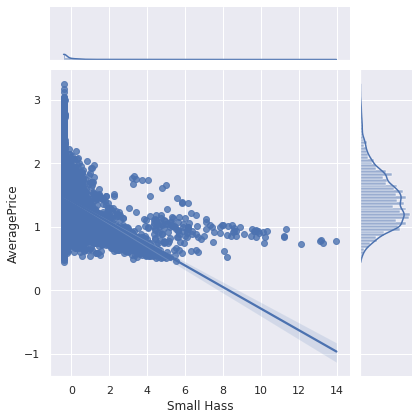

In [39]:
# Just before the regression analysis, I want to visualise the highly correlated Variables with the Average Prices;

import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x="Small Hass", y="AveragePrice", data=F_DF, kind="reg");


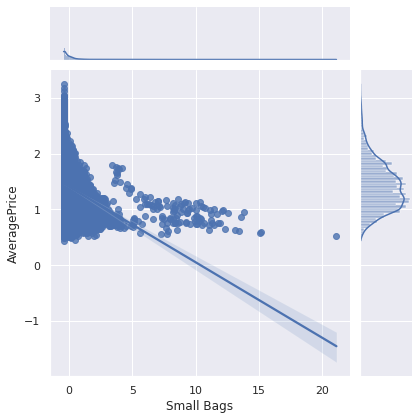

In [40]:
sns.jointplot(x="Small Bags", y="AveragePrice", data=F_DF, kind="reg");


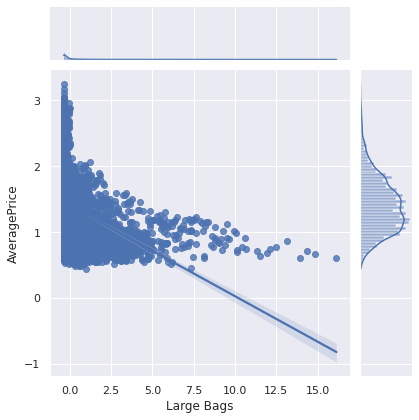

In [41]:
sns.jointplot(x="Large Bags", y="AveragePrice", data=F_DF, kind="reg");

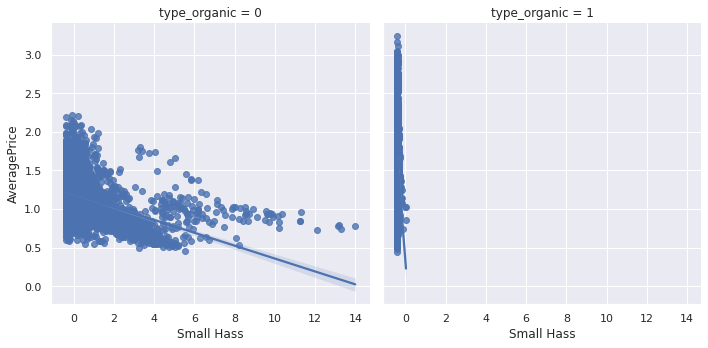

In [42]:
sns.lmplot(x="Small Hass", y="AveragePrice", col="type_organic", data=F_DF, col_wrap=2)

 Graphs shows that organic avocados have less elasticity to the price, compared to conventional ones.

# TRAIN and TEST SPLIT

 Since the data is a time series data (gives weekly avocado prices between Jan 2015 and Apr 2018)
 I sort it by Date and then split it due to date manually (not randomly), to preserve the 'times series effect' on it.
 I determined the split ratio as 0.30, so train and test data are just as follows;

In [43]:
X_train=X[0:10172]
y_train=y[0:10172]
X_test=X[10172:]
y_test=y[10172:]

# Implementing machine learning models

# Multiple Linear Regression 

In [44]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

print ("R2 of Linear Regresson:", LinReg.score(X_train,y_train) )

R2 of Linear Regresson: 0.6301508754411611


In [45]:
print('MAE: ',metrics.mean_absolute_error(y_test, LinReg.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, LinReg.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))))

MAE:  0.27813518864398135
MSE:  0.13623022254294329
RMSE: 0.36909378556532657


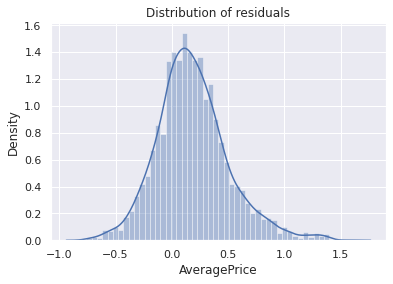

In [46]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - LinReg.predict(X_test))
plt.title('Distribution of residuals');

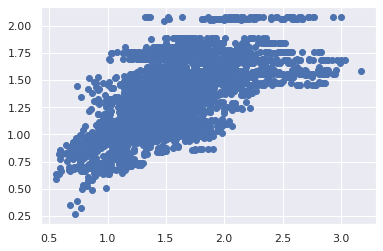

In [47]:
plt.scatter(y_test,LinReg.predict(X_test))

In [48]:
# we can confirm the R2 value (moreover, get the R2 Adj.value) of the model by statsmodels library of python
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # adding a constant
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     352.0
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:51:32   Log-Likelihood:                 13.526
No. Observations:               10172   AIC:                             72.95
Df Residuals:                   10122   BIC:                             434.3
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# LASSO and RIDGE Regressions


In [49]:
X_train=X[0:10172]
y_train=y[0:10172]
X_test=X[10172:]
y_test=y[10172:]

In [50]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-5,3,20)

clf = GridSearchCV(estimator=linear_model.Ridge(), param_grid=dict(alpha=alphas), cv=10)
clf.fit(X_train, y_train)
optlamGSCV_R = clf.best_estimator_.alpha
print('Optimum regularization parameter (Ridge):', optlamGSCV_R)

clf = GridSearchCV(estimator=linear_model.Lasso(), param_grid=dict(alpha=alphas), cv=10)
clf.fit(X_train, y_train)
optlamGSCV_L= clf.best_estimator_.alpha
print('Optimum regularization parameter (Lasso):', optlamGSCV_L)

Optimum regularization parameter (Ridge): 1.1288378916846884
Optimum regularization parameter (Lasso): 2.6366508987303556e-05


In [51]:
ridge = linear_model.Ridge(alpha = optlamGSCV_R) 
ridge.fit(X_train, y_train)
print('RMSE value of the Ridge Model is: ',np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))))

RMSE value of the Ridge Model is:  0.3686928210282293


In [52]:
ridge.score(X_train, y_train) #Returns the coefficient of determination (R2) of the prediction.

0.6300177814492275

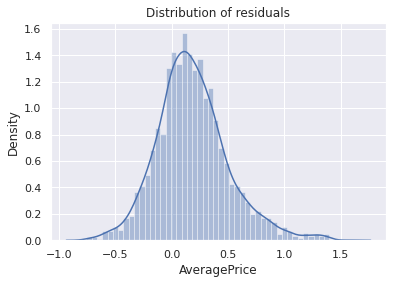

In [53]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - ridge.predict(X_test))
plt.title('Distribution of residuals');

In [54]:
lasso = linear_model.Lasso(alpha = optlamGSCV_L)
lasso.fit(X_train, y_train)
print('RMSE value of the Lasso Model is: ',np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))))

RMSE value of the Lasso Model is:  0.3687415591417541


In [55]:
lasso.score(X_train, y_train) #Returns the coefficient of determination R^2 of the prediction.


0.6300444213362757

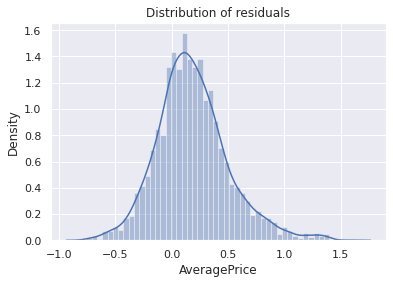

In [56]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - lasso.predict(X_test))
plt.title('Distribution of residuals');

Lasso picked 48 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

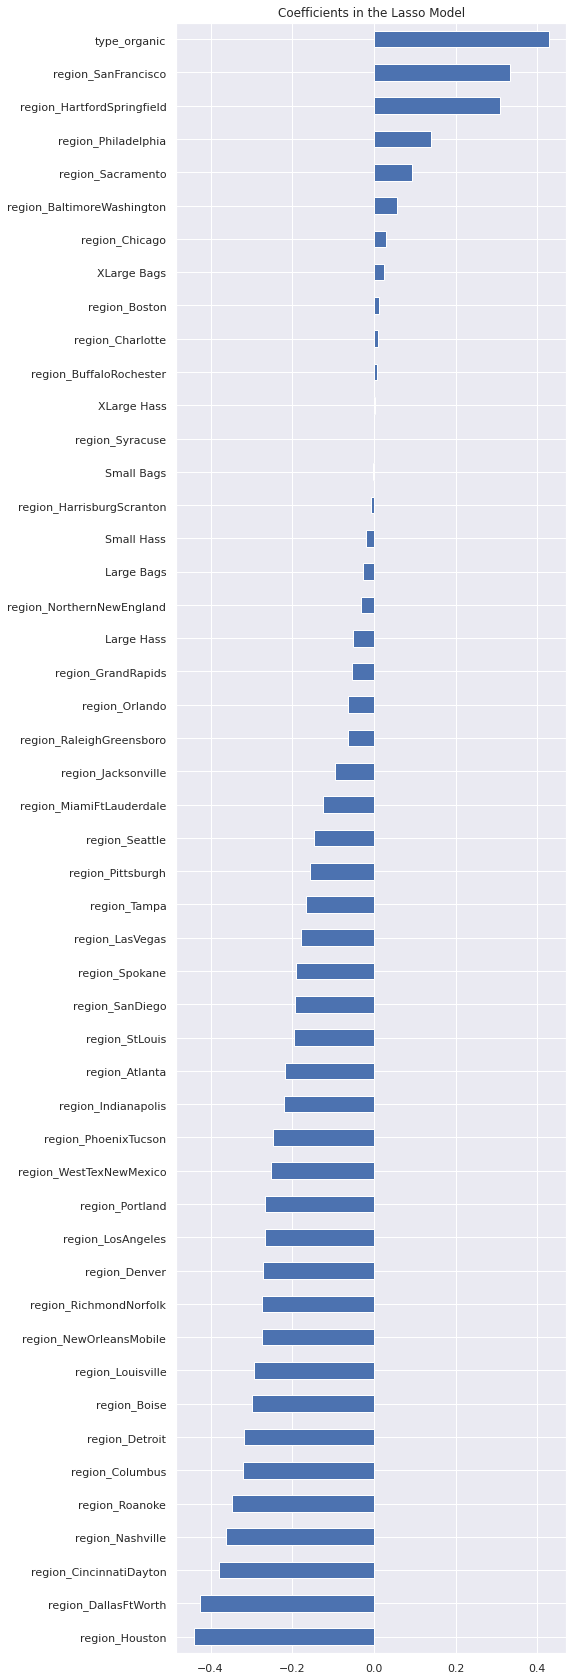

In [57]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values()]) #plot all
matplotlib.rcParams['figure.figsize'] = (7.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

Lasso picked 49 variables and eliminated the other 0 variables

 According to the RMSE results, Ridge works best compared to linear regression and lasso.

Let's see the other ML Models' RMSE values;

# KNN Regressor

In [58]:
from sklearn import neighbors
from math import sqrt

Knn = neighbors.KNeighborsRegressor()
Knn.fit(X_train, y_train)  
error = sqrt(metrics.mean_squared_error( y_test, Knn.predict(X_test))) 
print('RMSE value of the KNN Model is:', error)

RMSE value of the KNN Model is: 0.3693404375341122


In [59]:
Knn.score(X_train, y_train)  # R2 of the KNN model


0.921803734409565

 # SVR Regressor


In [60]:
from sklearn.svm import SVR
from sklearn import svm
# First, let's choose which kernel is the best for our data

for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_train, y_train)
    print(k,confidence)

linear 0.6239123164854408
poly 0.75280897009892
rbf 0.7827199975154489
sigmoid -145265.92826664285


In [61]:
Svr=SVR(kernel='rbf', C=1, gamma= 0.5)   # Parameter Tuning to get the best accuracy

In [62]:
Svr.fit(X_train,y_train)
print(Svr.score(X_train,y_train))

0.8157630648177014


In [63]:
error = sqrt(metrics.mean_squared_error(y_test,Svr.predict(X_test))) #calculate rmse
print('RMSE value of the SVR Model is:', error)

RMSE value of the SVR Model is: 0.35368647546814325


In [64]:
Svr.predict(X_test)[0:5]  # print the first 5 predictions of our test set

array([0.96281617, 1.3683581 , 1.51751545, 1.73245614, 2.24260752])

In [65]:
y_test[0:5]

16687    1.19
14938    1.18
16157    1.53
15521    2.00
15680    2.60
Name: AveragePrice, dtype: float64

# Decision Tree Regressor

In [66]:
# Determining the best depth
from sklearn.tree import DecisionTreeRegressor

minDepth = 100
minRMSE = 100000
for depth in range(2,10):
    tree_reg = DecisionTreeRegressor(max_depth=depth)
    tree_reg.fit(X_train, y_train)
    y_pred = tree_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("Depth:",depth,", MSE:", mse)
    print("Depth:",depth, ",RMSE:", rmse)
    if rmse < minRMSE:
        minRMSE = rmse
        minDepth = depth
        print("MinDepth:", minDepth)
        print("MinRMSE:", minRMSE)

Depth: 2 , MSE: 0.15685804338980766
Depth: 2 ,RMSE: 0.3960530815305035
MinDepth: 2
MinRMSE: 0.3960530815305035
Depth: 3 , MSE: 0.163481458226166
Depth: 3 ,RMSE: 0.40432840393195973
Depth: 4 , MSE: 0.16884049890340863
Depth: 4 ,RMSE: 0.41090205512190936
Depth: 5 , MSE: 0.16290865888653996
Depth: 5 ,RMSE: 0.4036194481024669
Depth: 6 , MSE: 0.15984049334076025
Depth: 6 ,RMSE: 0.39980056695902805
Depth: 7 , MSE: 0.1623231500471945
Depth: 7 ,RMSE: 0.40289347233132794
Depth: 8 , MSE: 0.15817892869499808
Depth: 8 ,RMSE: 0.3977171465941569
Depth: 9 , MSE: 0.15559414293039886
Depth: 9 ,RMSE: 0.39445423426602844
MinDepth: 9
MinRMSE: 0.39445423426602844


In [67]:
DTree=DecisionTreeRegressor(max_depth=minDepth)
DTree.fit(X_train,y_train)
print(DTree.score(X_train,y_train))  

0.7994103841390061


In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, DTree.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, DTree.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, DTree.predict(X_test))))

MAE: 0.29605143795483213
MSE: 0.15667023503894045
RMSE: 0.39581591054294474


# Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)
print(RForest.score(X_train,y_train))  

0.9836959721615693


In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, RForest.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, RForest.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RForest.predict(X_test))))

MAE: 0.28075338380362463
MSE: 0.14320046353292037
RMSE: 0.37841837102989645


# CONCLUSION 

# Comparing The RMSE Values Of The Models

In [71]:
# Linear Regression RMSE : 
print('RMSE value of the Linear Regr : ',round(np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))),4))

# Ridge RMSE             : 
print('RMSE value of the Ridge Model : ',round(np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))),4))

# Lasso RMSE             : 
print('RMSE value of the Lasso Model : ',round(np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))),4))

# KNN RMSE               : 
print('RMSE value of the KNN Model   : ',round(np.sqrt(metrics.mean_squared_error(y_test, Knn.predict(X_test))),4))

# SVR RMSE               : 
print('RMSE value of the SVR Model   : ',round(np.sqrt(metrics.mean_squared_error(y_test, Svr.predict(X_test))),4))

# Decision Tree RMSE     : 
print('RMSE value of the Decis Tree  : ',round(np.sqrt(metrics.mean_squared_error(y_test, DTree.predict(X_test))),4))

# Random Forest RMSE     : 
print('RMSE value of the Rnd Forest  : ',round(np.sqrt(metrics.mean_squared_error(y_test, RForest.predict(X_test))),4))


RMSE value of the Linear Regr :  0.3691
RMSE value of the Ridge Model :  0.3687
RMSE value of the Lasso Model :  0.3687
RMSE value of the KNN Model   :  0.3693
RMSE value of the SVR Model   :  0.3537
RMSE value of the Decis Tree  :  0.3958
RMSE value of the Rnd Forest  :  0.3784


SVR model gives the best predicts. (coefficient of determination of 82%)